In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
def plot_ebc(data, i, vmin=None, vmax=None):
    rbins = distance_bins.copy()
    abins = np.linspace(0, 2 * np.pi, 60)

    # Calculate histogram
    A, R = np.meshgrid(abins, rbins)

    # Plot
    fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
    fig.suptitle("cell_number: " + str(i))

    pc = ax.pcolormesh(A, R, data, cmap="jet", vmin=vmin, vmax=vmax)
    ax.set_theta_direction(1)
    ax.set_theta_offset(np.pi / 2.0)
    fig.colorbar(pc)
    return fig

In [9]:
#spike_data = np.load('spike_data_head.npy')
spike_data = np.load(r'\\iris\D\Pipeline\STA_Pipeline\spike_data_body.npy')
#ebc_data = np.load('egocentric_data_head.npy')
ebc_data = np.load(r'\\iris\D\Pipeline\STA_Pipeline\egocentric_data_body.npy')

ebc_data_flatten = ebc_data.reshape(-1,ebc_data.shape[1]*ebc_data.shape[2])
spike_data_T = spike_data.T

In [13]:
spike_data[6].shape

(217771,)

In [15]:
ebc_data_flatten.shape

(217771, 840)

(217771,)

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming X is your predictor data with shape (217771, 840)
# And y is your response data with shape (217771,)
# You can create random data for demonstration purposes
# Replace this with your actual data loading mechanism

np.random.seed(0)
X = ebc_data_flatten
y = spike_data[6]

# Convert X to DataFrame for statsmodels
df_X = pd.DataFrame(X, columns=[f'predictor_{i}' for i in range(1, 841)])

# Add a constant (intercept) to the model
df_X = sm.add_constant(df_X)

# Fit the Poisson GLM
poisson_model = sm.GLM(y, df_X, family=sm.families.Poisson()).fit()

# Print the summary of the model
print(poisson_model.summary())

# Access and print the weights (coefficients)
print("\nModel Coefficients:")
print(poisson_model.params)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               217771
Model:                            GLM   Df Residuals:                   216981
Model Family:                 Poisson   Df Model:                          789
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19479.
Date:                Sat, 20 Jul 2024   Deviance:                       28579.
Time:                        00:23:16   Pearson chi2:                 1.91e+06
No. Iterations:                   100   Pseudo R-squ. (CS):            0.06688
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -261.0627    171.875     -1.519

In [20]:
poisson_model.params

const           -261.062714
predictor_1        0.841784
predictor_2        0.530257
predictor_3       -0.198205
predictor_4        0.166613
                    ...    
predictor_836      0.000000
predictor_837      0.000000
predictor_838      0.000000
predictor_839      0.000000
predictor_840      0.000000
Length: 841, dtype: float64

In [26]:
weights = np.array(poisson_model.params[1:])

In [23]:
weights[0]

0.8417838097454448

In [24]:
import matplotlib.pyplot as plt
def plot_ebc(data, i, vmin=None, vmax=None):
    rbins = distance_bins.copy()
    abins = np.linspace(0, 2 * np.pi, 60)

    # Calculate histogram
    A, R = np.meshgrid(abins, rbins)

    # Plot
    fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
    fig.suptitle("cell_number: " + str(i))

    pc = ax.pcolormesh(A, R, data, cmap="jet", vmin=vmin, vmax=vmax)
    ax.set_theta_direction(1)
    ax.set_theta_offset(np.pi / 2.0)
    fig.colorbar(pc)
    return fig

In [27]:
reshaped = weights.reshape(ebc_data.shape[1],ebc_data.shape[2]) 

In [30]:
pos_reshaped = reshaped-np.min(reshaped)

In [28]:
distance_bins = np.arange(0,1120,80)
len(distance_bins)

14

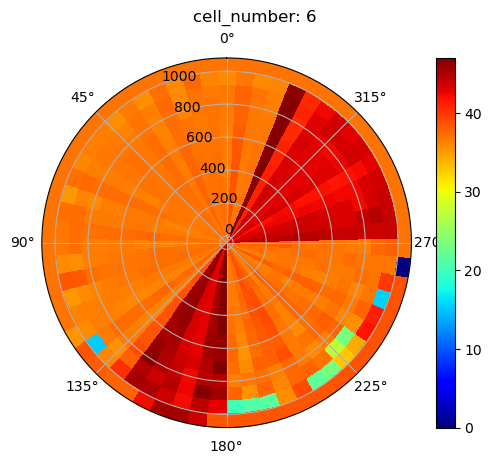

In [31]:
fig = plot_ebc(pos_reshaped,6)